In [ ]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mahotas==1.4.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


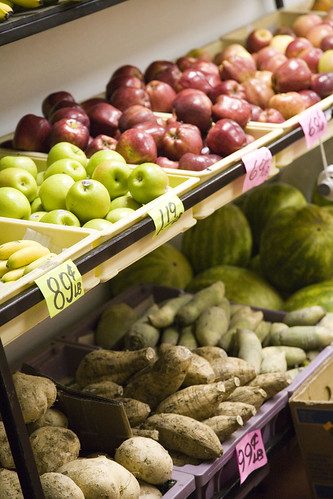

In [ ]:
import mahotas as mt
from skimage import io
import cv2
from google.colab.patches import cv2_imshow # for image display
image = io.imread('http://farm3.static.flickr.com/2225/2062534589_7e473b108c.jpg')
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
mt.features.haralick(image, ignore_zeros=True).mean(0)

array([ 9.83815510e-05,  1.45359367e+03,  8.55345871e-01,  5.04723238e+03,
        9.29952892e-02,  2.21124441e+02,  1.87353359e+04,  8.86642606e+00,
        1.44072949e+01,  1.07512698e-04,  5.88702273e+00, -1.79399894e-01,
        9.47218486e-01])

# Comunicação com Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Bibliotecas

In [ ]:
import numpy as np
import cv2 as cv
from skimage import io

import os
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import skimage.io
from skimage.io import imread

import cv2

In [ ]:
!git clone https://github.com/giakou4/pyfeats.git

fatal: destination path 'pyfeats' already exists and is not an empty directory.


In [ ]:
!cp -R /content/pyfeats/pyfeats/ features/ #Copiando biblioteca contendo extratores

In [ ]:
from features import *

In [ ]:
import re

def sorted_nicely( l ):
  """ Sort the given iterable in the way that humans expect."""
  convert = lambda text: int(text) if text.isdigit() else text
  alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
  return sorted(l, key = alphanum_key)

In [ ]:
def extract_feature_dataset(path, extractor='color', qtd=100):
  images_path = os.listdir(path)
  images_path = sorted_nicely(images_path)[0:qtd]
  category = os.path.basename(os.path.normpath(path))
  data = []
  images_name = []
  categories = []
  for n, image in enumerate(images_path):
    category = os.path.basename(os.path.normpath(path))
    img_name = category + image
    print('Extraindo: ', image, ' Category:', category, ' Quantidade: ', n, '/', len(images_path))
    image = cv.imread(os.path.join(path, image))
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    mask = np.ones((image_gray.shape[0], image_gray.shape[1]))

    features = []
    if extractor == 'color':
      dataset_hist_r = []
      dataset_hist_g = []
      dataset_hist_b = []

      color = ('r', 'g', 'b')
      counter = 0
      hist = {}
      for i, col in enumerate(color):
        histr = cv.calcHist([image_rgb], [i], None, [256], [0,256])
        if col == 'g':
          dataset_hist_g.append(histr)
        if col == 'b':
          dataset_hist_b.append(histr)
        if col == 'r':
          dataset_hist_r.append(histr)

      X_r = np.array(dataset_hist_r)
      length = np.sqrt((X_r**2).sum(axis=1))[:, None]
      X_r = X_r / length

      X_g = np.array(dataset_hist_g)
      length = np.sqrt((X_g**2).sum(axis=1))[:, None]
      X_g = X_g / length

      X_b = np.array(dataset_hist_b)
      length = np.sqrt((X_b**2).sum(axis=1))[:, None]
      X_b = X_b / length


      X = np.concatenate((X_r, X_g, X_b), axis=1)
      X.shape
      features = X.max(2)
    elif extractor == 'gray':
      histr = cv.calcHist([image_gray], [0], None, [32], [0,256])
      features = (histr).max(1)
    elif extractor == 'glcm':
      features = glcm_features(image_gray, ignore_zeros=True)[0]
    elif extractor == 'sfm':
      features = sfm_features(image_gray, mask, Lr=4, Lc=4)[0]
    elif extractor == 'lte':
      features = lte_measures(image_gray, mask, l=7)[0]
    elif extractor == 'fos':
      features = fos(image_gray, mask)[0]
    images_name.append(img_name)
    categories.append(category)
    features = np.append(features, category)
    data.append((features))
  return data, images_name

In [ ]:
dataset_path = "DATASET PATH"
dataset_class = images_path = os.listdir(dataset_path)
paths = []
for index, value in enumerate(dataset_class):
  paths.append(os.path.join(dataset_path, value))

print(f"Qtd class: {len(paths)}")
print("-----------------CLASS-----------------")
for i, v in enumerate(paths):
  value = v.split('/')[-1]
  print(value)
print("---------------------------------------")

Qtd class: 4
-----------------CLASS-----------------
normal
lung_opacity
pneumonia
covid
---------------------------------------


In [ ]:
def extract(paths):
  extractions = ['gray', 'fos','glcm', 'sfm', 'lte']
  for i, v in enumerate(extractions):
    dataset = []
    dataset_files = []
    dataset_categories = []
    print(f'Extractor: {v}')
    for index, value in enumerate(paths):
      (extractions, files) = extract_feature_dataset(paths[index], extractor=v, qtd=1000)
      dataset = dataset + extractions
      dataset_files = dataset_files + files

    df_data = pd.DataFrame(dataset)
    df_data.columns = [*df_data.columns[:-1], 'category']
    df_data['file'] = dataset_files
    #df_data = df_data.rename(columns={32: 'category'})
    output_path = f"OUTPUT_PATH/{v}.csv"
    df_data.to_csv(output_path, index=False)

extract(paths)

Streaming output truncated to the last 5000 lines.
Extraindo:  COVID-2.png  Category: covid  Quantidade:  1 / 1000
Extraindo:  COVID-3.png  Category: covid  Quantidade:  2 / 1000
Extraindo:  COVID-4.png  Category: covid  Quantidade:  3 / 1000
Extraindo:  COVID-5.png  Category: covid  Quantidade:  4 / 1000
Extraindo:  COVID-6.png  Category: covid  Quantidade:  5 / 1000
Extraindo:  COVID-7.png  Category: covid  Quantidade:  6 / 1000
Extraindo:  COVID-8.png  Category: covid  Quantidade:  7 / 1000
Extraindo:  COVID-9.png  Category: covid  Quantidade:  8 / 1000
Extraindo:  COVID-10.png  Category: covid  Quantidade:  9 / 1000
Extraindo:  COVID-11.png  Category: covid  Quantidade:  10 / 1000
Extraindo:  COVID-12.png  Category: covid  Quantidade:  11 / 1000
Extraindo:  COVID-13.png  Category: covid  Quantidade:  12 / 1000
Extraindo:  COVID-14.png  Category: covid  Quantidade:  13 / 1000
Extraindo:  COVID-15.png  Category: covid  Quantidade:  14 / 1000
Extraindo:  COVID-16.png  Category: covid 